                            PREDICTION OF EMPLOYEES SATISFACTION

Using a data base where there's different information regarding some employees, the goal is to make a predictive model for one of those features, 'employee satisfaction'.

In [2]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.tree import DecisionTreeClassifier


from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Data uploading and preparation

df = pd.read_excel('info_satisfaccion_trabajo.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [6]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [7]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [8]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [10]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [11]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [12]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [4]:
df['Attrition'].replace({'No': 1, 'Yes': 2}, inplace=True)
df['BusinessTravel'].replace({'Travel_Rarely' : 2, 'Travel_Frequently' : 3, 'Non-Travel': 1}, inplace=True)
df['Gender'].replace({'Male': 1, 'Female': 2}, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)
df['OverTime'].replace({'No': 1, 'Yes': 2}, inplace=True)
df['Department'].replace({'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3}, inplace=True)
df['EducationField'].replace({'Life Sciences' : 1, 'Other' : 0, 'Medical' : 2, 'Marketing' : 3,
                              'Technical Degree' : 4, 'Human Resources' : 5}, inplace=True)
df['JobRole'].replace({'Sales Executive' : 1, 'Research Scientist' : 2, 'Laboratory Technician' : 3,
                       'Manufacturing Director' : 4, 'Healthcare Representative' : 5, 'Manager' : 6,
                       'Sales Representative' : 7, 'Research Director' : 8, 'Human Resources' : 9},
                      inplace=True)
df['MaritalStatus'].replace({'Single' : 1, 'Married' : 2, 'Divorced' : 3}, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,3,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,2,2,1373,2,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,3,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,2,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


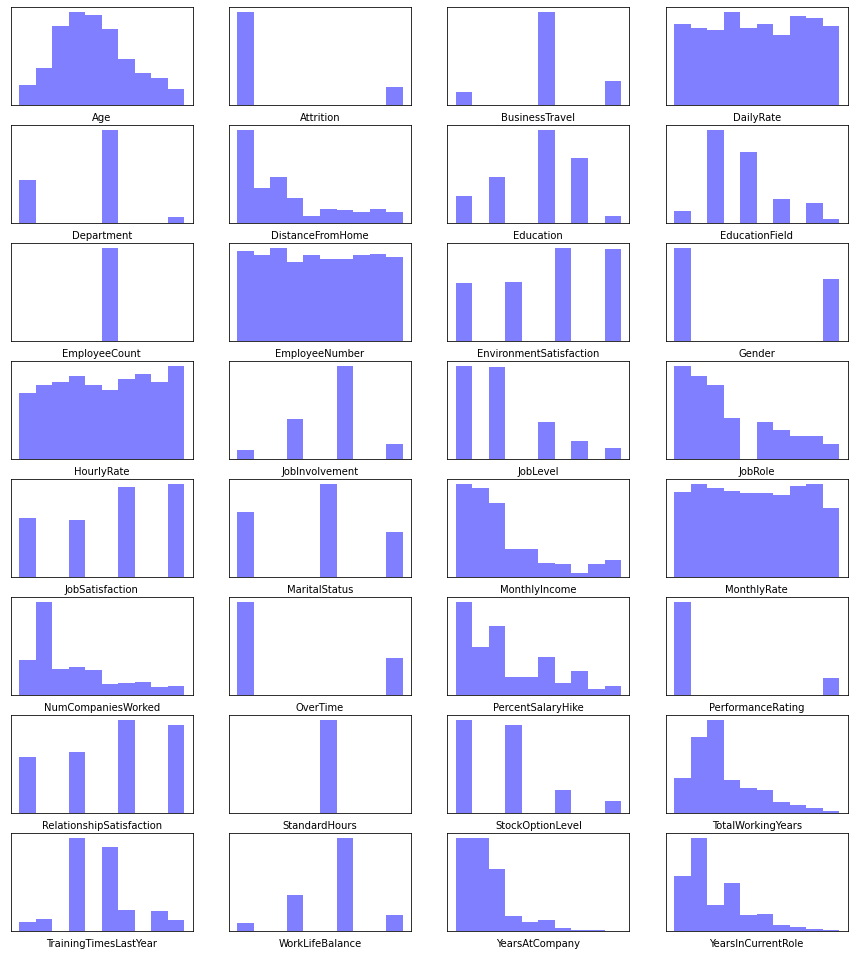

In [14]:
ncols = 4
nrows = 8
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 17))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5, density = True)
            ax.set_xlabel(df.columns[counter])
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.set_axis_off()
        counter += 1

plt.show()

In [5]:
df.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1102,1,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,3,279,2,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,2,2,1373,2,2,2,0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,1,3,1392,2,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,591,2,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2


Now that the data is clean and prepared, we proceed to analyze two different classifiers so we achieve the goal proposed. First we divide the data set into training and test sets so we can test our model. Then we try to look for the best possible parameters for the models.

In [6]:
y = df['JobSatisfaction']
X = df.drop('JobSatisfaction', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [25]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Logistic Regression with preprocessing

print('Accuracy of Logistic Regression Classifier')

for c in (0.1,1,10,50,100):
    model = LogisticRegression(C=c).fit(X_train, y_train)
    print('On training set, parameter c = {} : {:.2f}'
          .format(c,model.score(X_train, y_train)))
    print('On test set, parameter c = {} : {:.2f}'
          .format(c,model.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier
On training set, parameter c = 0.1 : 0.32
On test set, parameter c = 0.1 : 0.28
On training set, parameter c = 1 : 0.33
On test set, parameter c = 1 : 0.30
On training set, parameter c = 10 : 0.33
On test set, parameter c = 10 : 0.32
On training set, parameter c = 50 : 0.33
On test set, parameter c = 50 : 0.30
On training set, parameter c = 100 : 0.33
On test set, parameter c = 100 : 0.30


In [26]:
print('Accuracy of Support Vector Classifier')
for c in (0.01,0.1,1,10,50,100):
    for g in (0.1,1,5,13):
        model = SVC(kernel = 'rbf', gamma=g, C = c).fit(X_train_scaled, y_train)
        print('On training set with gamma = {} and parameter c = {}: {:.2f}'.format(g,c,model.score(X_train_scaled, y_train)))
        print('On test set with gamma = {} and parameter c = {}: {:.2f}'.format(g,c,model.score(X_test_scaled, y_test)))

Accuracy of Support Vector Classifier
On training set with gamma = 0.1 and parameter c = 0.01: 0.32
On test set with gamma = 0.1 and parameter c = 0.01: 0.30
On training set with gamma = 1 and parameter c = 0.01: 0.32
On test set with gamma = 1 and parameter c = 0.01: 0.30
On training set with gamma = 5 and parameter c = 0.01: 0.32
On test set with gamma = 5 and parameter c = 0.01: 0.30
On training set with gamma = 13 and parameter c = 0.01: 0.32
On test set with gamma = 13 and parameter c = 0.01: 0.30
On training set with gamma = 0.1 and parameter c = 0.1: 0.32
On test set with gamma = 0.1 and parameter c = 0.1: 0.30
On training set with gamma = 1 and parameter c = 0.1: 0.32
On test set with gamma = 1 and parameter c = 0.1: 0.30
On training set with gamma = 5 and parameter c = 0.1: 0.32
On test set with gamma = 5 and parameter c = 0.1: 0.30
On training set with gamma = 13 and parameter c = 0.1: 0.32
On test set with gamma = 13 and parameter c = 0.1: 0.30
On training set with gamma = 0

In [13]:
print('Accuracy of K-Nearest Neighbor Classifier')
for i in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train) 
    print('On training set with {} neigbors: {:.2f}'.format(i,model.score(X_train, y_train)))
    print('On test set with {} neigbors: {:.2f}'.format(i,model.score(X_test, y_test)))

Accuracy of K-Nearest Neighbor Classifier
On training set with 1 neigbors: 1.00
On test set with 1 neigbors: 0.22
On training set with 2 neigbors: 0.62
On test set with 2 neigbors: 0.22
On training set with 3 neigbors: 0.59
On test set with 3 neigbors: 0.22
On training set with 4 neigbors: 0.53
On test set with 4 neigbors: 0.27
On training set with 5 neigbors: 0.50
On test set with 5 neigbors: 0.24
On training set with 6 neigbors: 0.48
On test set with 6 neigbors: 0.26
On training set with 7 neigbors: 0.47
On test set with 7 neigbors: 0.28
On training set with 8 neigbors: 0.47
On test set with 8 neigbors: 0.26
On training set with 9 neigbors: 0.46
On test set with 9 neigbors: 0.27
On training set with 10 neigbors: 0.46
On test set with 10 neigbors: 0.26
On training set with 11 neigbors: 0.42
On test set with 11 neigbors: 0.26
On training set with 12 neigbors: 0.42
On test set with 12 neigbors: 0.27
On training set with 13 neigbors: 0.42
On test set with 13 neigbors: 0.27
On training se

In [16]:
print('Accuracy of Decision Tree Classifier')
for p in (1,3,5,7,10):
    for l in (4,8,12,16):
        model = DecisionTreeClassifier(max_depth = p, min_samples_leaf = l).fit(X_train, y_train)
        print('On training set, max depth = {}, min elaf samples = {}: {:.2f}'.format(p,l,model.score(X_train, y_train)))
        print('On test set, max depth = {}, min leaf samples = {}: {:.2f}'.format(p,l,model.score(X_test, y_test)))

Accuracy of Decision Tree Classifier
On training set, max depth = 1, min elaf samples = 4: 0.34
On test set, max depth = 1, min leaf samples = 4: 0.29
On training set, max depth = 1, min elaf samples = 8: 0.34
On test set, max depth = 1, min leaf samples = 8: 0.29
On training set, max depth = 1, min elaf samples = 12: 0.34
On test set, max depth = 1, min leaf samples = 12: 0.29
On training set, max depth = 1, min elaf samples = 16: 0.34
On test set, max depth = 1, min leaf samples = 16: 0.29
On training set, max depth = 3, min elaf samples = 4: 0.37
On test set, max depth = 3, min leaf samples = 4: 0.27
On training set, max depth = 3, min elaf samples = 8: 0.36
On test set, max depth = 3, min leaf samples = 8: 0.28
On training set, max depth = 3, min elaf samples = 12: 0.37
On test set, max depth = 3, min leaf samples = 12: 0.27
On training set, max depth = 3, min elaf samples = 16: 0.37
On test set, max depth = 3, min leaf samples = 16: 0.27
On training set, max depth = 5, min elaf sa

In [21]:
bosque = RandomForestClassifier()
param = {'criterion': ('gini', 'entropy', 'log_loss'), 'n_estimators': (150, 170, 100), 'max_samples': (1/3, 1/4, 1/5),
        'max_features' : ('sqrt', 'log2')}
grid = GridSearchCV(bosque, param, scoring = 'accuracy').fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.31971871619185
{'criterion': 'entropy', 'max_features': 'sqrt', 'max_samples': 0.2, 'n_estimators': 170}


In [19]:
grid.score(X_test,y_test)

0.2619047619047619

So, reviewing the options of models we see there's not model good enought. However, the best of what we got was with SVC with gamma = 0,1 and parameter c=1. The score on trainning set is 39% and 33% on test set. 
The less overfit moodel and with higher score is with Logistic Regression with parameter c = 10. The score is 33% in training set and 32% in test set.